C:\Users\Shadow\AppData\Local\Temp\ipykernel_20216\1537342895.py:8: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


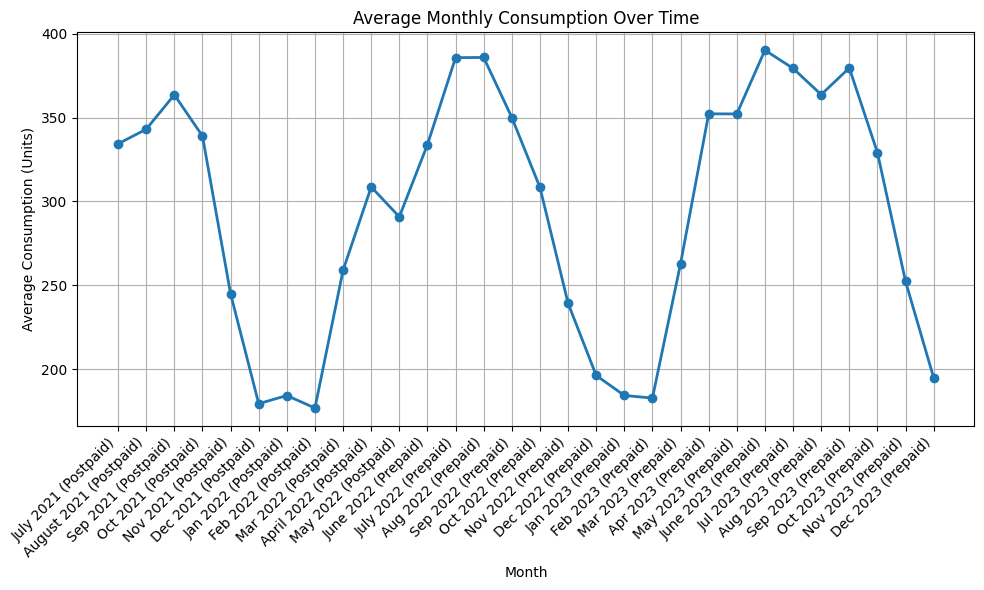

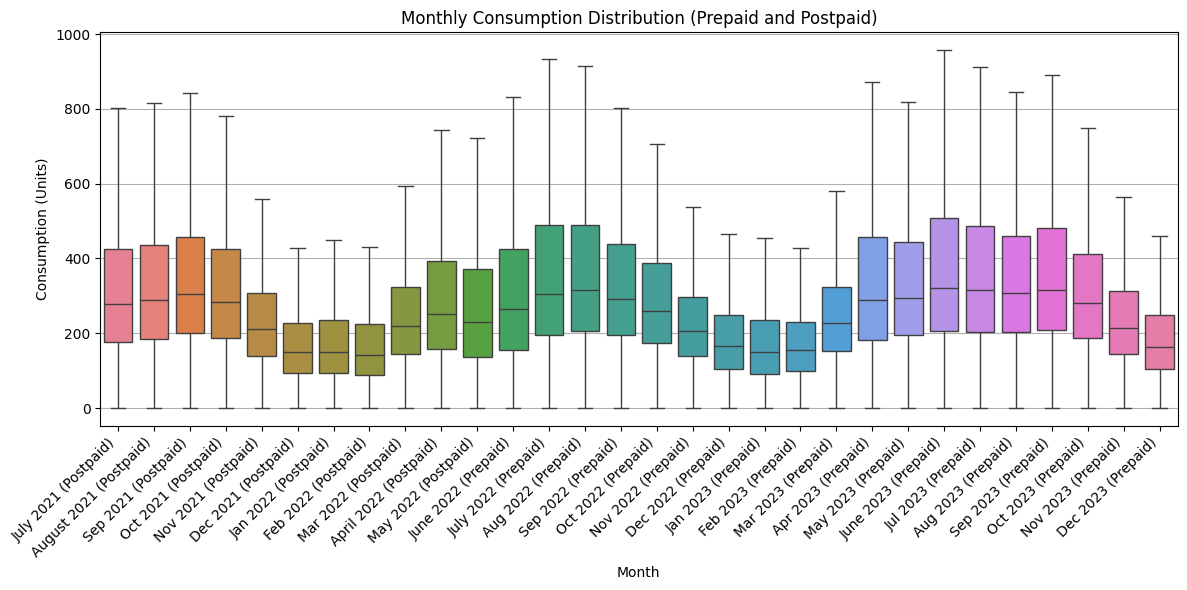

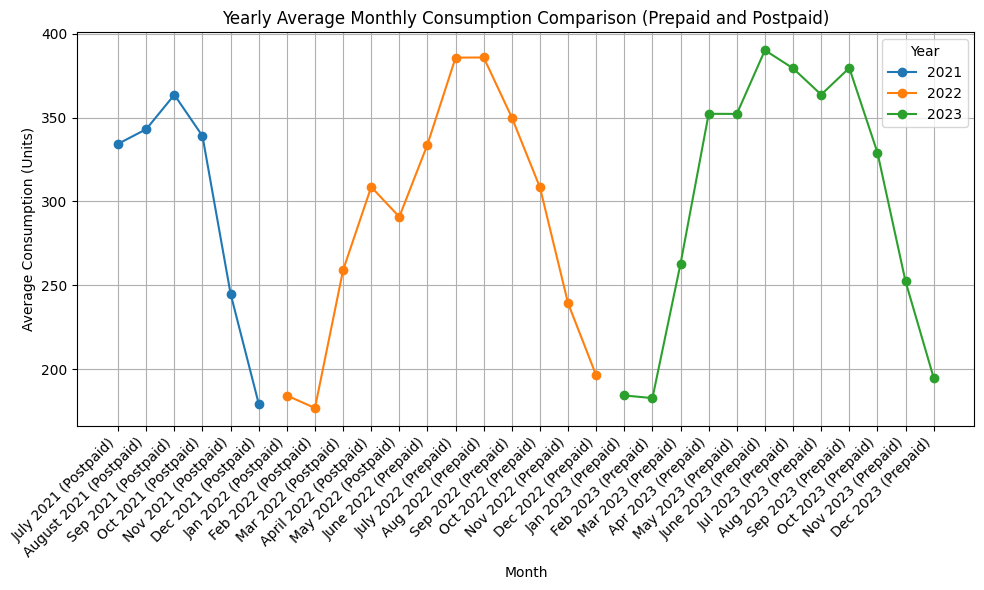

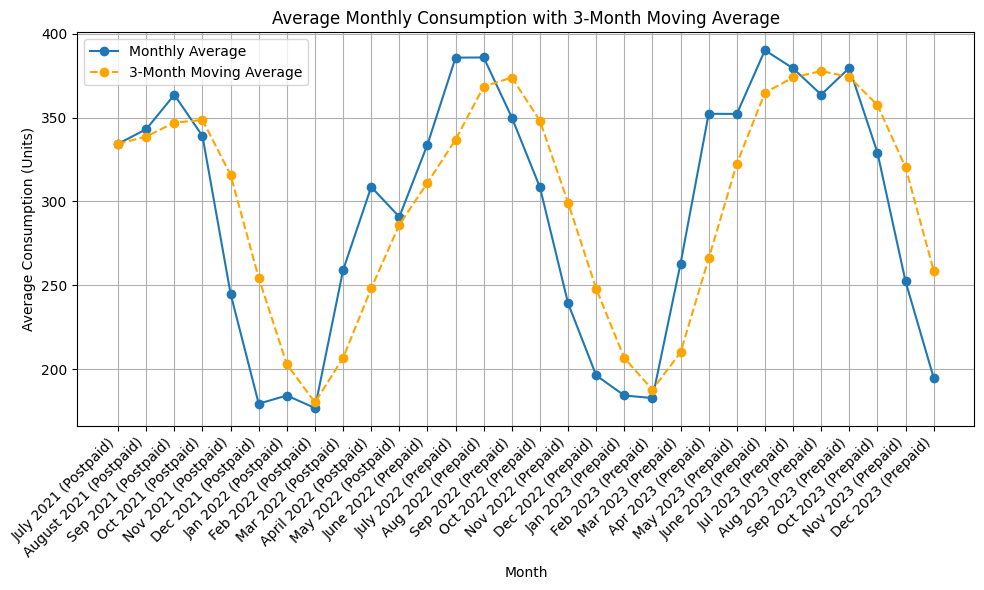

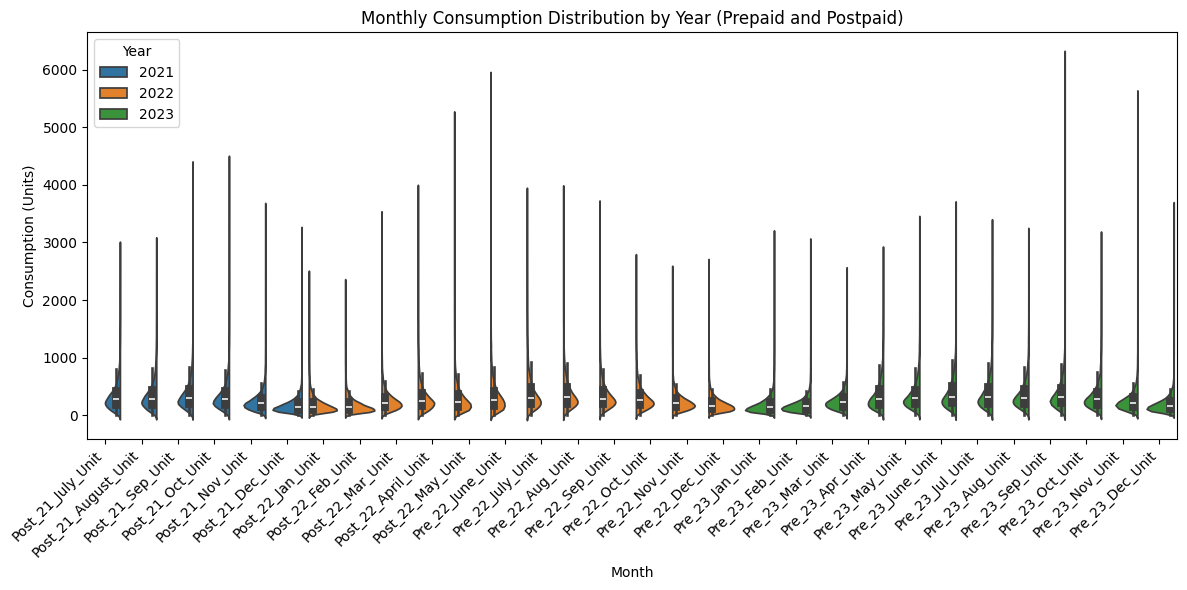

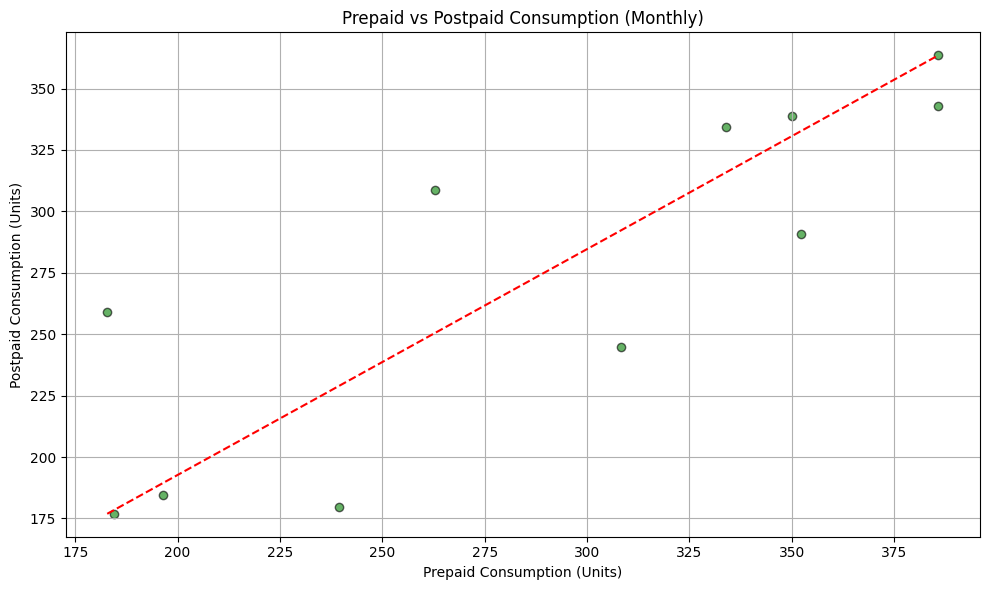

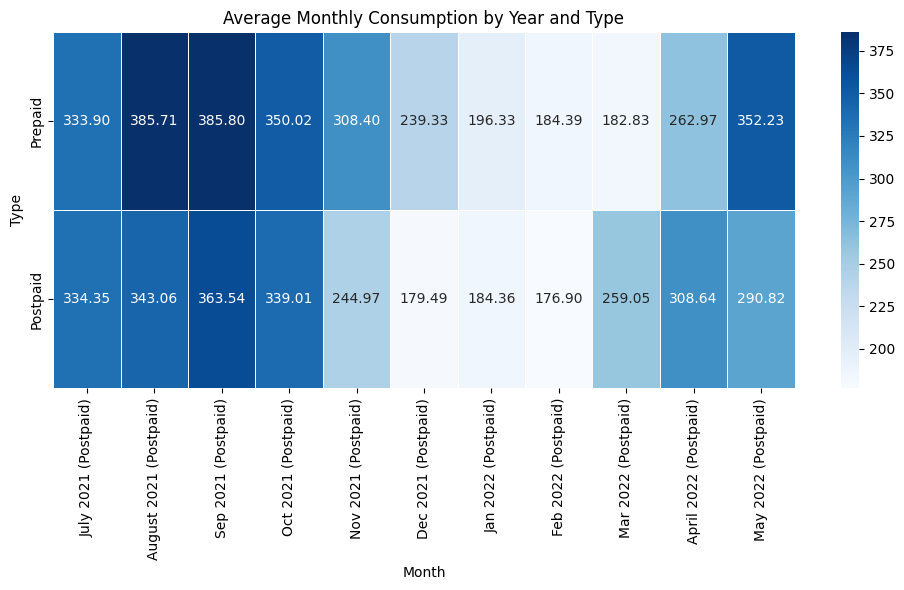

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Extract columns that represent monthly units
monthly_columns = [col for col in data.columns if '_unit' in col]

# Convert the monthly columns to numeric types, coercing errors to NaN
data[monthly_columns] = data[monthly_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the average monthly consumption across all customers
average_monthly_consumption = data[monthly_columns].apply(pd.to_numeric, errors='coerce').mean()

# Extract months for labeling in chronological order
months_mod = [
    col.replace('_unit', '')
       .replace('pre_', 'Prepaid: ')
       .replace('post_', 'Postpaid: ')
       .replace('21', '2021')
       .replace('22', '2022')
       .replace('23', '2023')
       .replace('_', ' ')
       .title()
    for col in monthly_columns
]

# Swap the position of month and year to be "Month Year"
months = [
    ' '.join([part.strip() for part in label.split(':')[1].split()[::-1]]) + f" ({label.split(':')[0]})"
    for label in months_mod
]

years = ['2021', '2022', '2023']

# Plot the time series of average monthly consumption
plt.figure(figsize=(10, 6))
plt.plot(months, average_monthly_consumption, marker='o', linestyle='-', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.title('Average Monthly Consumption Over Time')
plt.xlabel('Month')
plt.ylabel('Average Consumption (Units)')
plt.grid(True)
plt.tight_layout()
plt.savefig('average_monthly_consumption.png', dpi=300)
plt.show()

# Corrected Box Plot: Monthly consumption distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[monthly_columns].apply(pd.to_numeric, errors='coerce'), showfliers=False)
plt.xticks(ticks=np.arange(len(months)), labels=months, rotation=45, ha='right')
plt.title('Monthly Consumption Distribution (Prepaid and Postpaid)')
plt.xlabel('Month')
plt.ylabel('Consumption (Units)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('monthly_consumption_distribution.png', dpi=300)
plt.show()

# Yearly Trend Comparison
formatted_months = months
yearly_data = pd.DataFrame(index=formatted_months)
yearly_data['Average Consumption'] = average_monthly_consumption.values

# Line plot for yearly comparison
plt.figure(figsize=(10, 6))
for year in years:
    year_data = yearly_data[yearly_data.index.str.contains(year)]
    plt.plot(year_data.index, year_data['Average Consumption'], marker='o', label=f'{year}')

plt.xticks(rotation=45, ha='right')
plt.title('Yearly Average Monthly Consumption Comparison (Prepaid and Postpaid)')
plt.xlabel('Month')
plt.ylabel('Average Consumption (Units)')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.savefig('yearly_average_comparison.png', dpi=300)
plt.show()

# Suggested New Visualizations
# 1. Consumption Trend with Moving Average
plt.figure(figsize=(10, 6))
rolling_avg = average_monthly_consumption.rolling(window=3, min_periods=1).mean()
plt.plot(months, average_monthly_consumption, marker='o', linestyle='-', label='Monthly Average')
plt.plot(months, rolling_avg, marker='o', linestyle='--', color='orange', label='3-Month Moving Average')
plt.xticks(rotation=45, ha='right')
plt.title('Average Monthly Consumption with 3-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('Average Consumption (Units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('average_monthly_with_moving_average.png', dpi=300)
plt.show()

# 2. Monthly Consumption Distribution by Year (Violin Plot)
plt.figure(figsize=(12, 6))
data_melted = pd.melt(data[monthly_columns].apply(pd.to_numeric, errors='coerce'), var_name='Month', value_name='Consumption')
data_melted['Year'] = data_melted['Month'].str.extract('(21|22|23)').replace({'21': '2021', '22': '2022', '23': '2023'})
data_melted['Month'] = data_melted['Month'].str.replace('pre_|post_|_unit', '').str.title()
sns.violinplot(x='Month', y='Consumption', hue='Year', data=data_melted, split=True)
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Consumption Distribution by Year (Prepaid and Postpaid)')
plt.xlabel('Month')
plt.ylabel('Consumption (Units)')
plt.tight_layout()
plt.savefig('monthly_consumption_violinplot.png', dpi=300)
plt.show()

# 3. Scatter Plot for Prepaid vs Postpaid Consumption (Monthly)
plt.figure(figsize=(10, 6))
prepaid_values = data[monthly_columns].filter(like='pre_').apply(pd.to_numeric, errors='coerce').mean().values
postpaid_values = data[monthly_columns].filter(like='post_').apply(pd.to_numeric, errors='coerce').mean().values

# Ensure both arrays are the same length by trimming to the minimum length
min_length = min(len(prepaid_values), len(postpaid_values))
prepaid_values = prepaid_values[:min_length]
postpaid_values = postpaid_values[:min_length]

plt.scatter(prepaid_values, postpaid_values, c='green', edgecolors='black', alpha=0.6)
plt.plot([min(prepaid_values), max(prepaid_values)], [min(postpaid_values), max(postpaid_values)], 'r--')
plt.xlabel('Prepaid Consumption (Units)')
plt.ylabel('Postpaid Consumption (Units)')
plt.title('Prepaid vs Postpaid Consumption (Monthly)')
plt.grid(True)
plt.tight_layout()
plt.savefig('prepaid_vs_postpaid_scatter.png', dpi=300)
plt.show()

# 4. Heatmap of Average Monthly Consumption by Year and Type
avg_data = pd.DataFrame({'Prepaid': prepaid_values, 'Postpaid': postpaid_values}, index=months[:min_length])
plt.figure(figsize=(10, 6))
sns.heatmap(avg_data.T, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')
plt.title('Average Monthly Consumption by Year and Type')
plt.xlabel('Month')
plt.ylabel('Type')
plt.tight_layout()
plt.savefig('average_consumption_heatmap.png', dpi=300)
plt.show()

In [2]:
highest_consumption_customer = data[monthly_columns].idxmax()

# Print highest consumption customer for each month
print("Highest consumption customer for each month:")
for month, customer in highest_consumption_customer.items():
    print(f"{month}: Customer {data.loc[customer, 'Customer No']}")

Highest consumption customer for each month:
post_21_july_unit: Customer 17429238
post_21_august_unit: Customer 17429238
post_21_sep_unit: Customer 17430513
post_21_oct_unit: Customer 17430513
post_21_nov_unit: Customer 17430513
post_21_dec_unit: Customer 17846661
post_22_jan_unit: Customer 17430551
post_22_feb_unit: Customer 17429238
post_22_mar_unit: Customer 17430513
post_22_april_unit: Customer 17430513
post_22_may_unit: Customer 16299866
pre_22_june_unit: Customer 17497285
pre_22_july_unit: Customer 17647071
pre_22_aug_unit: Customer 17647071
pre_22_sep_unit: Customer 17345841
pre_22_oct_unit: Customer 17815841
pre_22_nov_unit: Customer 17345943
pre_22_dec_unit: Customer 17345943
pre_23_jan_unit: Customer 17381884
pre_23_feb_unit: Customer 17785609
pre_23_mar_unit: Customer 17625539
pre_23_apr_unit: Customer 17640072
pre_23_may_unit: Customer 17640072
pre_23_june_unit: Customer 17640072
pre_23_jul_unit: Customer 17640072
pre_23_aug_unit: Customer 17640072
pre_23_sep_unit: Customer